In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.c_country import C_Country
from utils.graph_generator import get_path

from utils.dotdict import dotdict
from utils.params import init_graph, get_centrum
from utils.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving


import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

import os
import pickle



In [2]:
import networkx as nx

In [3]:
args = {
    "--p_moving": 0.015, 
    "--p_worker": 1.0, 
    "--beta": 0.5,
    "--beta_super":0.0, 
    "--seed": 0,
    "--sigma": 1.0, 
    "--gamma": 0.2,
    "--max_sim": 500,
    "inf_agent_num":1000,
}

# Degree distribution

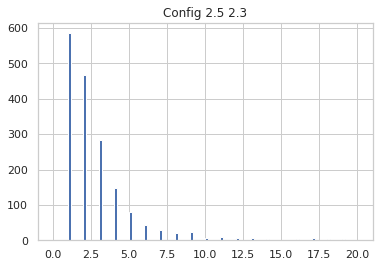

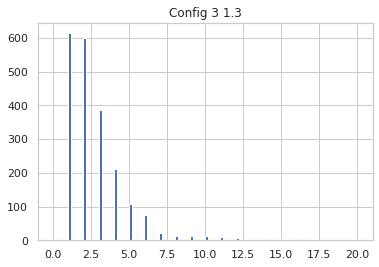

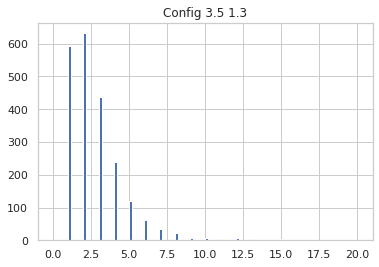

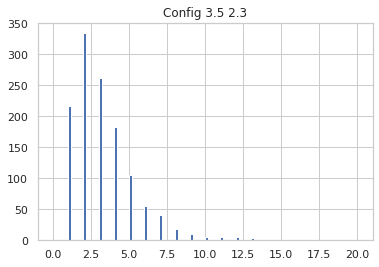

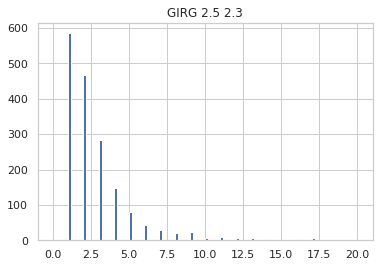

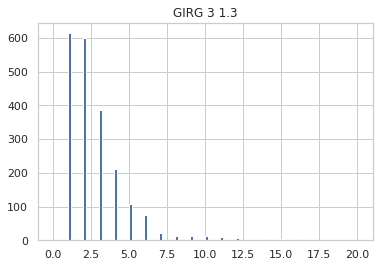

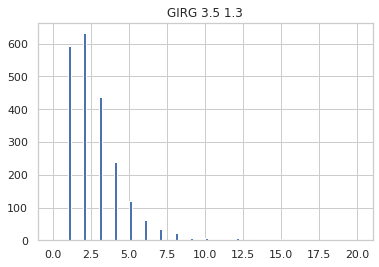

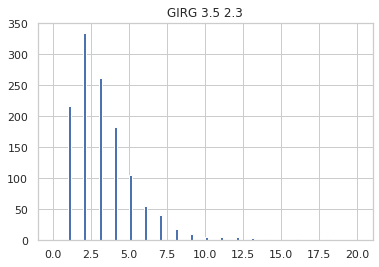

CPU times: user 3min 6s, sys: 1min 16s, total: 4min 23s
Wall time: 2min 17s


In [4]:
%%time
for config in [True, False]:
    for GIRG_args in [GIRG_args1, GIRG_args2, GIRG_args3, GIRG_args4]:        
        GIRG_args["N"]=3000
        GIRG_args["config_model"]=config
        GIRG_args["random_seed"]=0
        graph = init_graph(GIRG_args)
        
        degree = nx.degree(graph)
        plt.hist(dict(degree).values(), bins=100, range=(0,20))
        #plt.yscale('log')
        plt.title("{} {} {}".format("Config" if GIRG_args["config_model"] else "GIRG", GIRG_args["tau"], GIRG_args["alpha"]))
        plt.show()

In [5]:
GIRG_args1

{'name': 'GIRG',
 'N': 3000,
 'tau': 2.5,
 'alpha': 2.3,
 'C_1': 0.8,
 'whished_edgenum': 3000,
 'pop_in_city': 2000,
 'random_seed': 0,
 'verbose': False,
 'config_model': False,
 'edge_weigth': 11.363635363636364}

# Hierarchical graphs

[0, 1, 2, 3, 4] 1 4


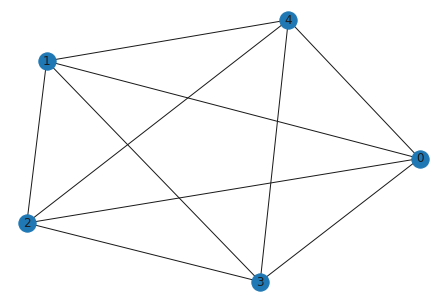

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 5 20


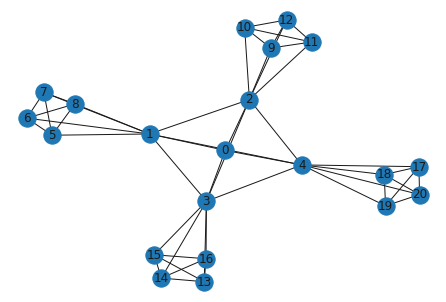

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84] 21 84


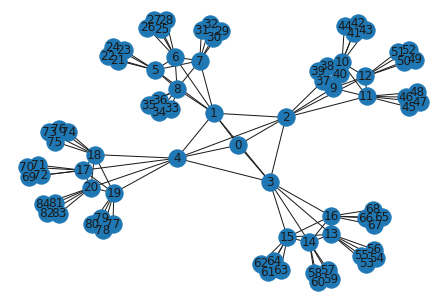

In [4]:
def extend_leafes(graph, n1, n2, k=4):
    ind0 = len(graph)
    
    for x in range(n2-n1+1):
        for j1 in range(k):
            x1 = ind0+k*x+j1
            graph.add_edge(n1+x,x1)
            #print(n1+x,x1)
            for j2 in range(j1+1,k):
                x2 = ind0+k*x+j2
                graph.add_edge(x1,x2)
                #print(x1,x2)

    return graph,ind0,x1

def get_hierarchical_graph(k, head):
    graph = nx.Graph()
    graph.add_node(0)
    a,b = 0,0

    shells = [[0]]
    for i in range(k):
        graph,a,b = extend_leafes(graph, a, b)
        shells.append(list(range(a,b+1)))
    
    if(head != None):
        n = head["n"]
        for i in range(int(head["p1"]*n*n/2)):
            u,v = np.random.randint(0,n,2)
            #print(u,v)
            graph.add_edge(u,v)
        
        N = len(graph)
        for i in range(int(head["p2"]*N*N/2)):
            u,v = np.random.randint(0,N,2)
            graph.add_edge(u,v)
    
    return graph, shells

    
graph = nx.Graph()
graph.add_node(0)

graph,a,b = extend_leafes(graph, 0, 0)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()

graph,a,b = extend_leafes(graph, a, b)
print(graph.nodes,a,b)
nx.draw(graph, with_labels=True)
plt.show()


In [5]:
print("Neighbours of node",55,":", sorted(dict(graph[55]).keys()))

Neighbours of node 55 : [13, 53, 54, 56]


graph size:  341


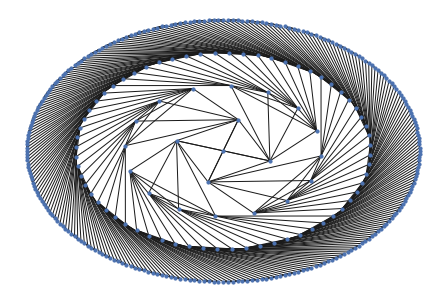

In [6]:
graph,shells = get_hierarchical_graph(4, None)

#print(80,sorted(dict(graph[80]).keys()))
print("graph size: ", len(graph))

pos = nx.shell_layout(graph, shells)
nx.draw(graph, pos = pos, node_size=10, node_color='b')
plt.show()

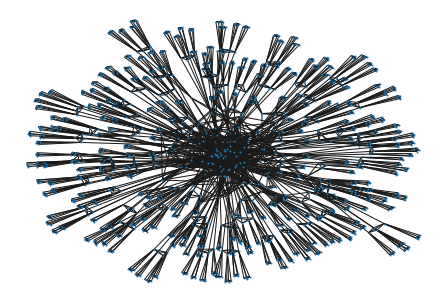

In [7]:
#pos = nx.shell_layout(graph, shells)
graph,shells = get_hierarchical_graph(5, head={"n":84, "p1":0.1, "p2":0.000})
nx.draw(graph, node_size=1)
plt.show()

In [8]:
print("Shell sizes: ")
for i in range(1,10):
    graph,shells = get_hierarchical_graph(i, head=None)
    print(i,":", len(graph))

Shell sizes: 
1 : 5
2 : 21
3 : 85
4 : 341
5 : 1365
6 : 5461
7 : 21845
8 : 87381
9 : 349525


In [9]:
import pandas as pd
from utils.params import init_graph, get_centrum
from scripts.GPU_percolation_script import run_nets2
from utils.ecl_utils import get_graphstream


ps = np.concatenate(
    (np.linspace(0,0.05, 12),
     np.linspace(0.05, 0.2, 15)[1:])
)

inp_args = {
    "--seed":0,
    "--mode":"simulation",
    #"--verbose":False,
    "--sim_num":2000,
    "log_folder":"data"
}


def run_percolation(graph, centrum, ss, ps):
    inp_args["--s_nonlin"] = str(len(ss))+" "+" ".join([str(s) for s in ss])
    print("Graph size: ", len(graph))
    nx.set_edge_attributes(graph, 1,"weight")
    g_stream = get_graphstream(graph, centrum, {"verbose":False})
    run_nets2(inp_args, g_stream, ps)
    
def plot_percolation(ss, title):
    df = pd.read_csv("data/grid_median_all_-1_-1.csv")

    plt.figure(figsize=(15,10))

    for s in ss:
        plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

    plt.xlabel("p")
    plt.ylabel("Ratio")
    plt.legend()
    plt.title(title)

# Hierarchical graph

Graph size:  5461
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1376993[ms]
>>> Reading input time = 77087[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1394971[ms]
>>> Reading input time = 77218[ms]
[Python] Error: None
CPU times: user 1.02 s, sys: 88.5 ms, total: 1.1 s
Wall time: 37.4 s


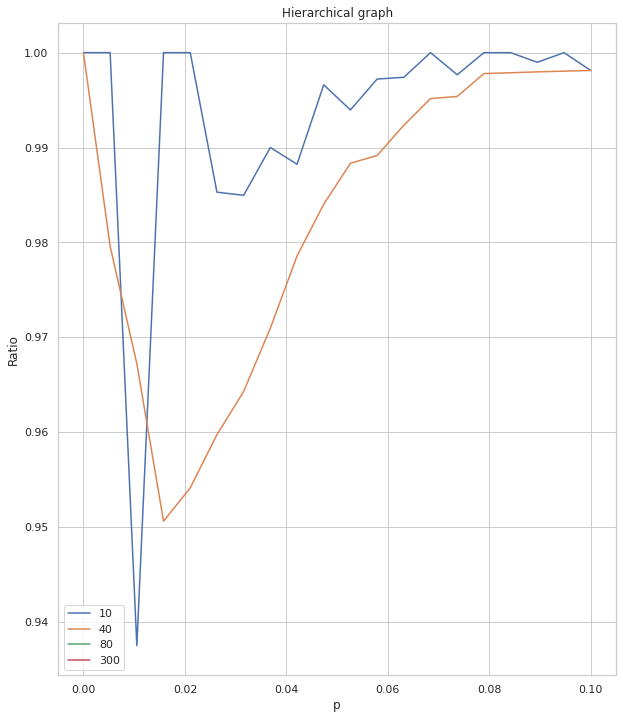

In [74]:
%%time

ss = [10,40,80,300]
inp_args["--sim_num"]=1000

centrum = list(range(341))
graph,shells = get_hierarchical_graph(6, head={"n":341, "p1":0.1, "p2":0.000})

run_percolation(graph, centrum, ss, np.linspace(0,0.1, 20))
plot_percolation(ss)

In [13]:
max(ss), inp_args["--s_nonlin"]

(15, '2 10 15')

In [18]:
len(set(centrum)), centrum

(26,
 array([    0, 15625, 31250, 46875, 62500,  3125,  6250,  9375, 12500,
        18750, 21875, 25000, 28125, 34375, 37500, 40625, 43750, 50000,
        53125, 56250, 59375, 65625, 68750, 71875, 75000,   625]))

Graph size:  2187
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1383191[ms]
>>> Reading input time = 55591[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1383224[ms]
>>> Reading input time = 55719[ms]
[Python] Error: None


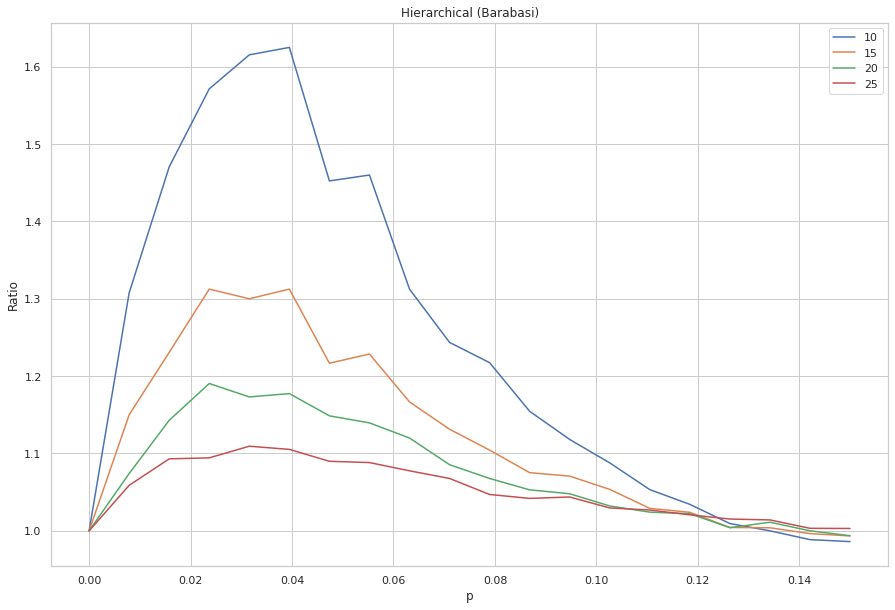

Graph size:  16384
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1397496[ms]
>>> Reading input time = 116561[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1400356[ms]
>>> Reading input time = 116396[ms]
[Python] Error: None


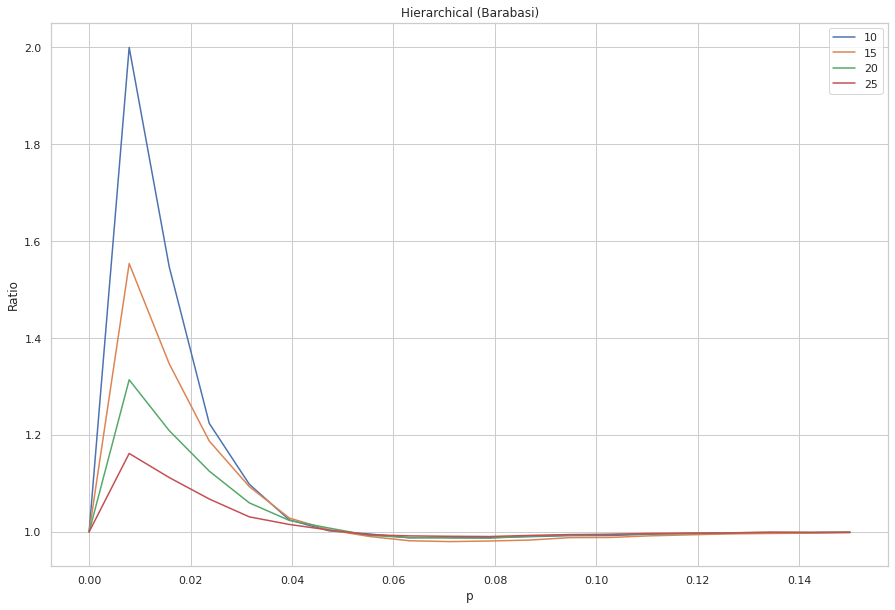

Graph size:  78125
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1386954[ms]
>>> Reading input time = 457646[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1414857[ms]
>>> Reading input time = 506846[ms]
[Python] Error: None


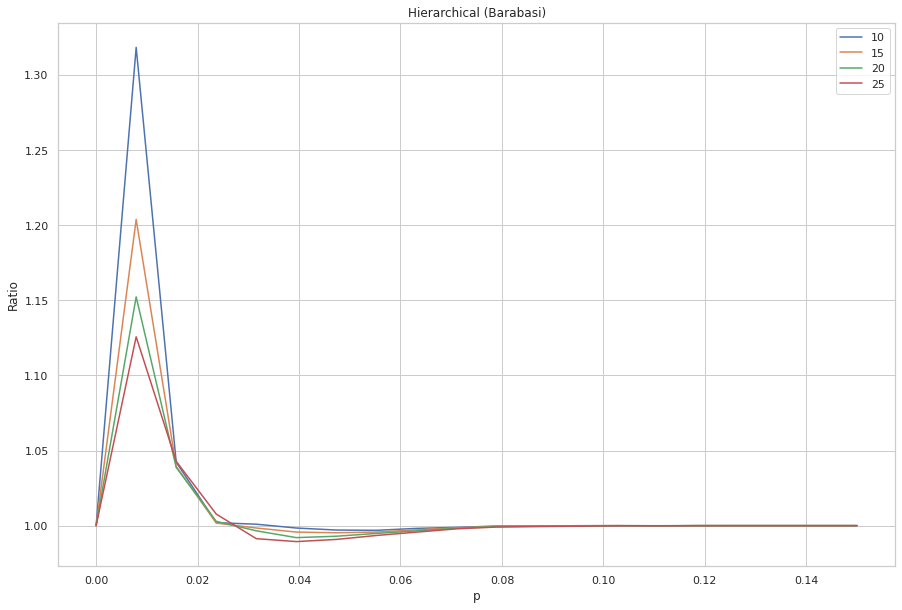

In [19]:
from utils.hierarchical_graphs import ToyHierarchicalGraph, SimpleHierarchicalGraph

for k in range(3,6):
    gen = SimpleHierarchicalGraph()
    graph, per = gen.get(depth = 7, k=k)


    ss = [10,15, 20, 25]
    inp_args["--sim_num"]=1000

    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:max(ss)+10,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.15, 20))
    plot_percolation(ss, "Hierarchical (Barabasi)")
    plt.show()

# Erdős-Rényi graph

Graph size:  3000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1385831[ms]
>>> Reading input time = 115639[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382111[ms]
>>> Reading input time = 116004[ms]
[Python] Error: None


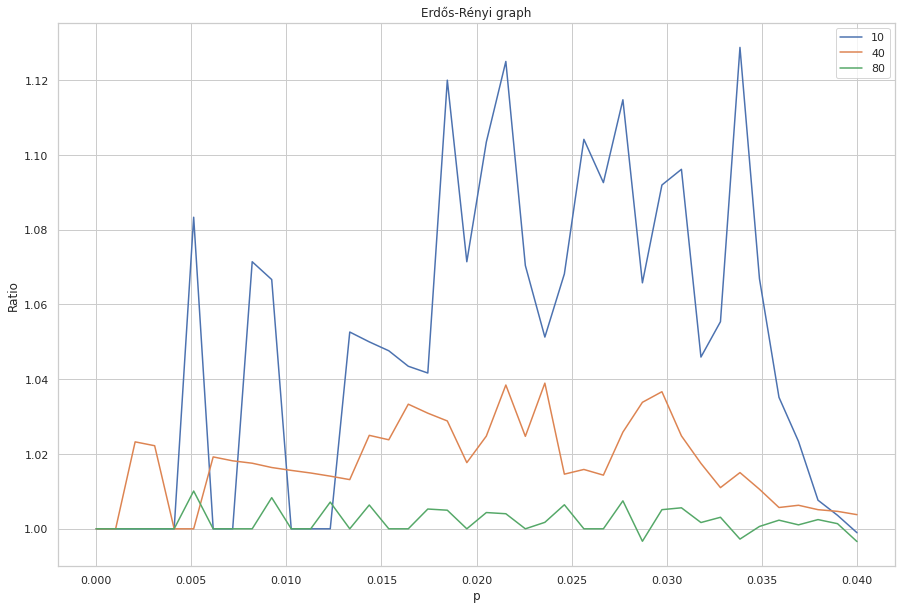

In [20]:
inp_args["--sim_num"]=1000
ss = [10,40,80]
#for p in [0.01, 0.03, 0.09]:
for p in [0.01]:
    graph = nx.erdos_renyi_graph(3000,p)
    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:max(ss)+10,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.04, 40))
    plot_percolation(ss, title="Erdős-Rényi graph")
    plt.show()

# Barabási preferencial attachment graph

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1410575[ms]
>>> Reading input time = 71556[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1389938[ms]
>>> Reading input time = 71728[ms]
[Python] Error: None


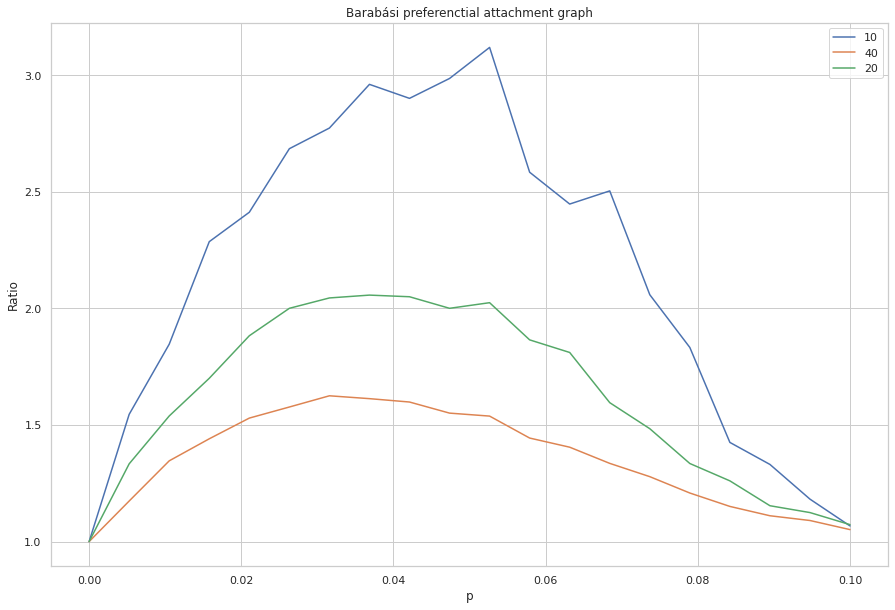

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1372922[ms]
>>> Reading input time = 78665[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1381093[ms]
>>> Reading input time = 78439[ms]
[Python] Error: None


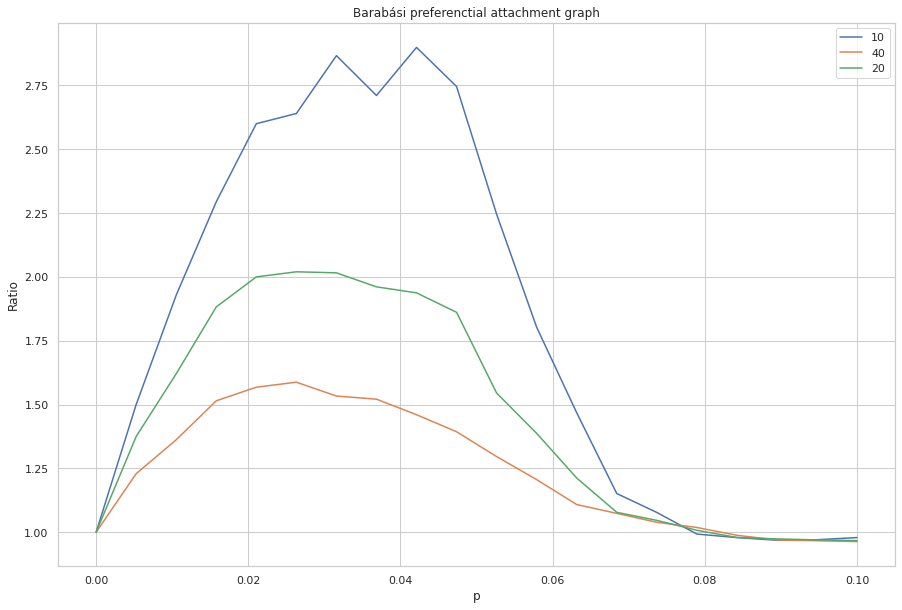

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1396990[ms]
>>> Reading input time = 85953[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1402381[ms]
>>> Reading input time = 85837[ms]
[Python] Error: None


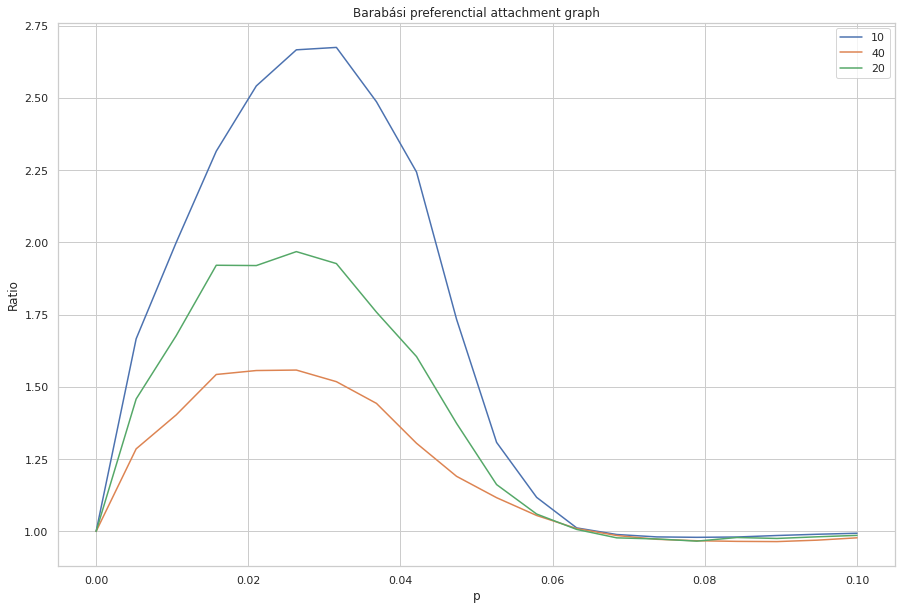

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1401567[ms]
>>> Reading input time = 92807[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1437293[ms]
>>> Reading input time = 93076[ms]
[Python] Error: None


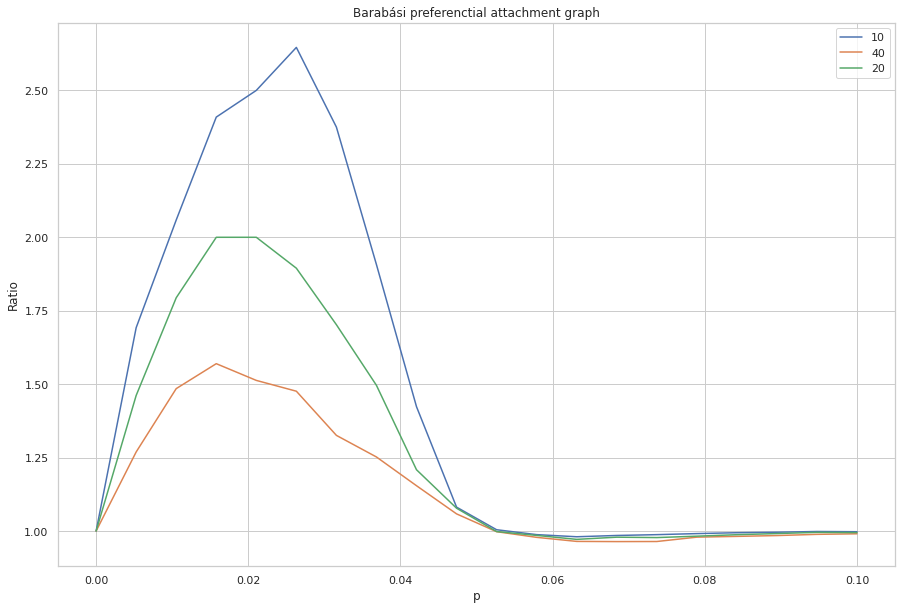

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1376297[ms]
>>> Reading input time = 100023[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1401197[ms]
>>> Reading input time = 100596[ms]
[Python] Error: None


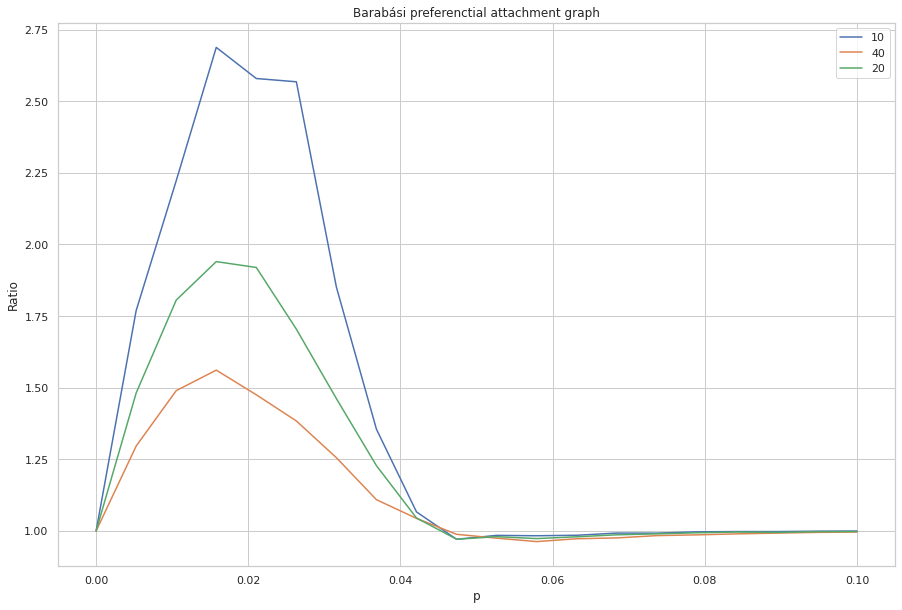

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1387488[ms]
>>> Reading input time = 107320[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1390089[ms]
>>> Reading input time = 107148[ms]
[Python] Error: None


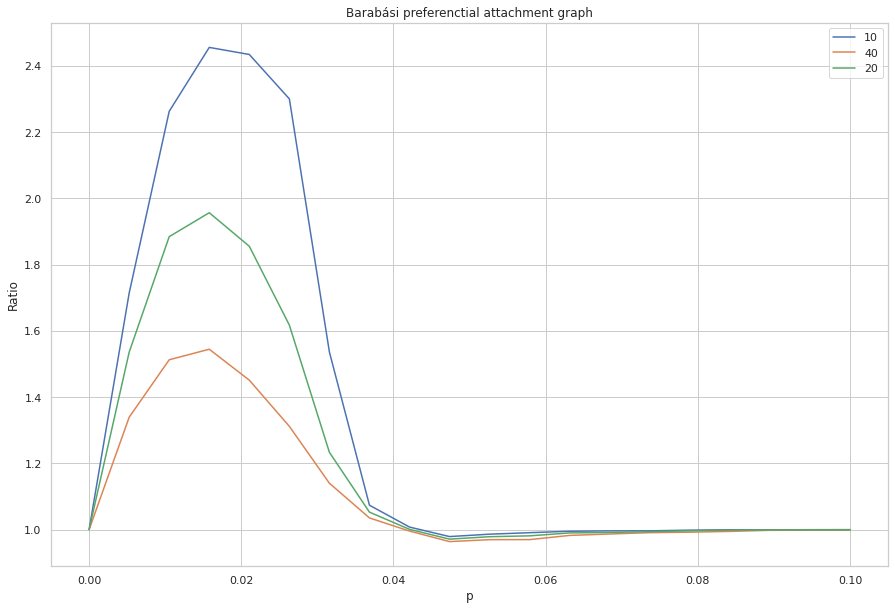

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1400701[ms]
>>> Reading input time = 119072[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1376781[ms]
>>> Reading input time = 114270[ms]
[Python] Error: None


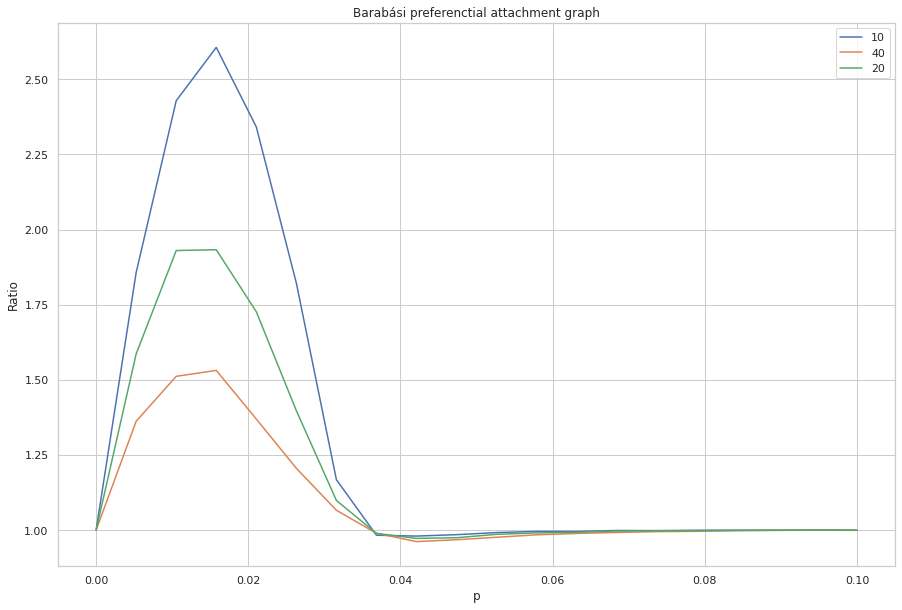

In [21]:
ss = [10,40,80]

inp_args["--sim_num"]=300
for i in range(3,10):
    graph = nx.barabasi_albert_graph(5000,i)
    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:300,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.1, 20))
    plot_percolation(ss, "Barabási preferenctial attachment graph")
    plt.show()

In [34]:
a = (341*341*0.1)
b = (341*5)
a,b,a/b

(11628.1, 1705, 6.82)

Text(0.5, 1.0, 'Hierarchical graph')

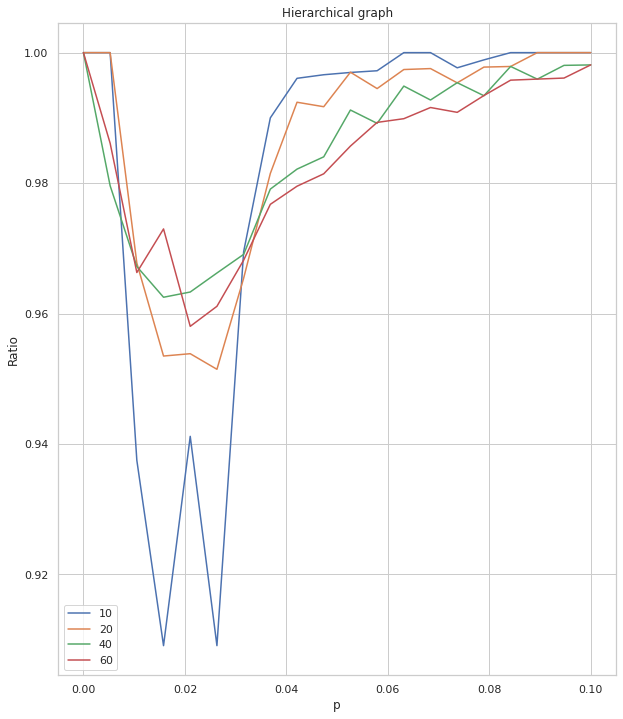

In [30]:
# p1 = 0.1, c = 341
df = pd.read_csv("data/grid_median_all_-1_-1.csv")

plt.figure(figsize=(10,12))

for s in ss:
    plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

plt.xlabel("p")
plt.ylabel("Ratio")
plt.legend()
plt.title("Hierarchical graph")

Text(0.5, 1.0, 'Hierarchical graph')

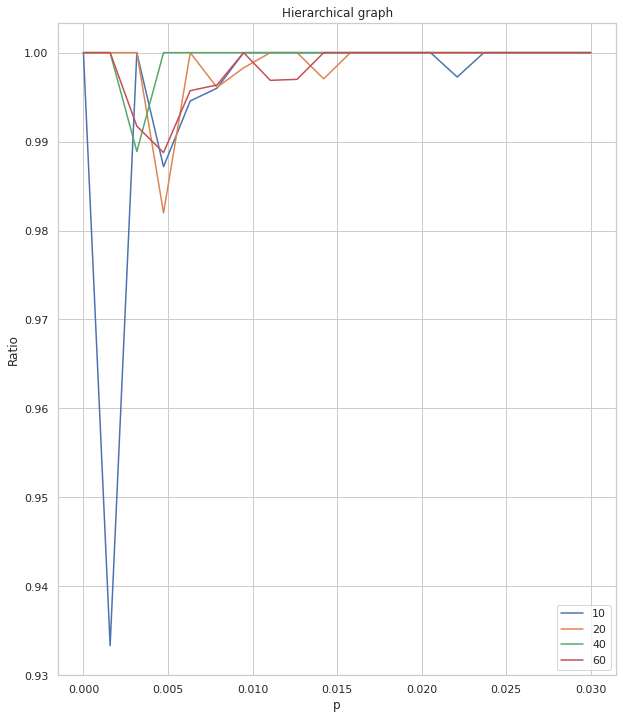

In [26]:
# p1 = 1.0, c = 341
df = pd.read_csv("data/grid_median_all_-1_-1.csv")

plt.figure(figsize=(10,12))

for s in ss:
    plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

plt.xlabel("p")
plt.ylabel("Ratio")
plt.legend()
plt.title("Hierarchical graph")

Text(0.5, 1.0, 'Hierarchical graph')

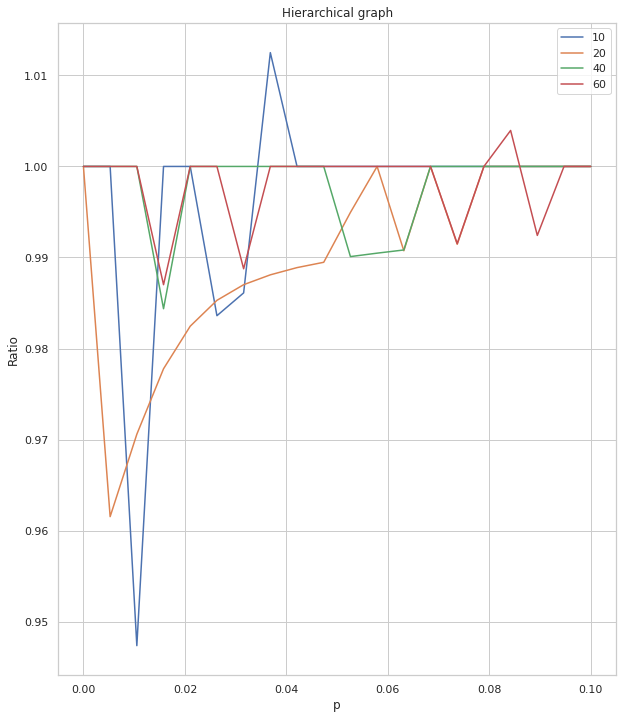

In [22]:
# p1 = 1.0, c = 84
df = pd.read_csv("data/grid_median_all_-1_-1.csv")

plt.figure(figsize=(10,12))

for s in ss:
    plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

plt.xlabel("p")
plt.ylabel("Ratio")
plt.legend()
plt.title("Hierarchical graph")

Text(0.5, 1.0, 'Hierarchical graph')

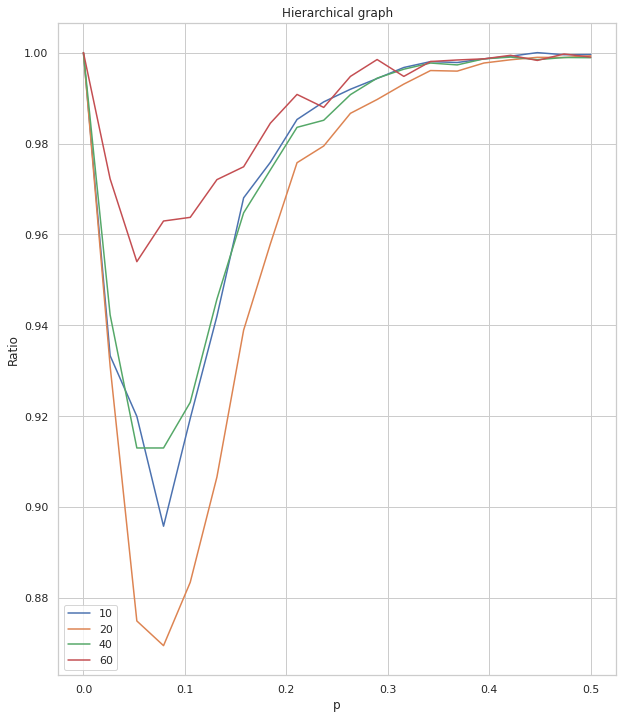

In [18]:
# p1 = 0.1, c = 84
df = pd.read_csv("data/grid_median_all_-1_-1.csv")

plt.figure(figsize=(10,12))

for s in ss:
    plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

plt.xlabel("p")
plt.ylabel("Ratio")
plt.legend()
plt.title("Hierarchical graph")

In [34]:
g1 = nx.Graph()

g1.add_edge(0,1)
g1.add_edge(1,2)
g1.add_edge(0,2)

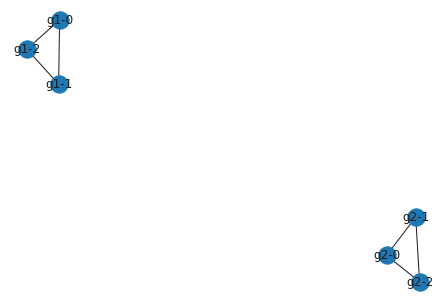

In [42]:
G = nx.algorithms.operators.all.union_all((g1,g1),rename=("g1-","g2-"))

nx.draw(G, with_labels=True)

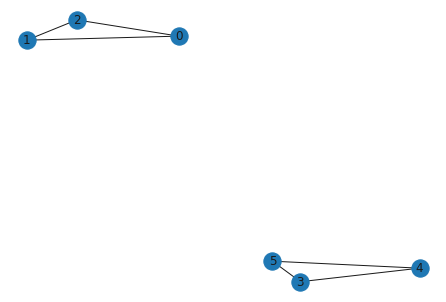

In [41]:
G = nx.algorithms.operators.all.disjoint_union_all((g1,g1))

nx.draw(G, with_labels=True)
